In [19]:
#importing packages
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ms = pd.read_csv('data/microsoft.csv')

In [4]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [5]:
#Convert the 'Date' column to datetime format
ms['Date'] = pd.to_datetime(ms['Date'])

# Set the 'Date' column as the index
ms.set_index('Date', inplace=True)

In [6]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [7]:
print(ms.shape)

(780, 6)


In [8]:
#showing summary of statistics of Microsoft
ms.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,58.912308,59.372308,58.465000,58.945397,56.931553,2.978900e+07
std,12.852040,12.868060,12.802831,12.830350,13.670080,1.522319e+07
min,40.340000,40.740002,39.720001,40.290001,37.267815,7.425600e+06
25%,47.894998,48.295000,47.535001,47.974998,44.792073,2.096685e+07
50%,56.150002,56.640001,55.700001,56.209999,53.775458,2.623125e+07
75%,67.892500,68.174997,67.447500,67.740000,66.565508,3.408020e+07
max,95.139999,96.070000,93.720001,95.010002,94.565781,1.691640e+08


The above shows the statistics of the Microsoft data. 

In [9]:
#select all the price information of Microsoft in 2016
ms_2016 = ms.loc['2016-01-01':'2016-12-31']

In [10]:
#print the price of Microsoft on '2016-03-16'
ms_2016.loc['2016-03-16']

Open         5.345000e+01
High         5.460000e+01
Low          5.340000e+01
Close        5.435000e+01
Adj Close    5.187095e+01
Volume       3.169170e+07
Name: 2016-03-16 00:00:00, dtype: float64

In [11]:
ms_2015=ms.loc['2015-01-01':'2015-12-31']

In [12]:
#print the price of Microsoft on '2015-01-07'
ms_2015.loc['2015-01-07']

Open         4.598000e+01
High         4.646000e+01
Low          4.549000e+01
Close        4.623000e+01
Adj Close    4.264582e+01
Volume       2.911410e+07
Name: 2015-01-07 00:00:00, dtype: float64

One can select data for an entire year using loc method. I selected data for 2015 and 2016 and then called out specific data from two different dates in the years. 

### Locating a particular row of data using "Selection by position"

In [13]:
# print the opening price of the first row
print(ms.iloc[0, 0])

46.73


### Plot the stock data using plot() method

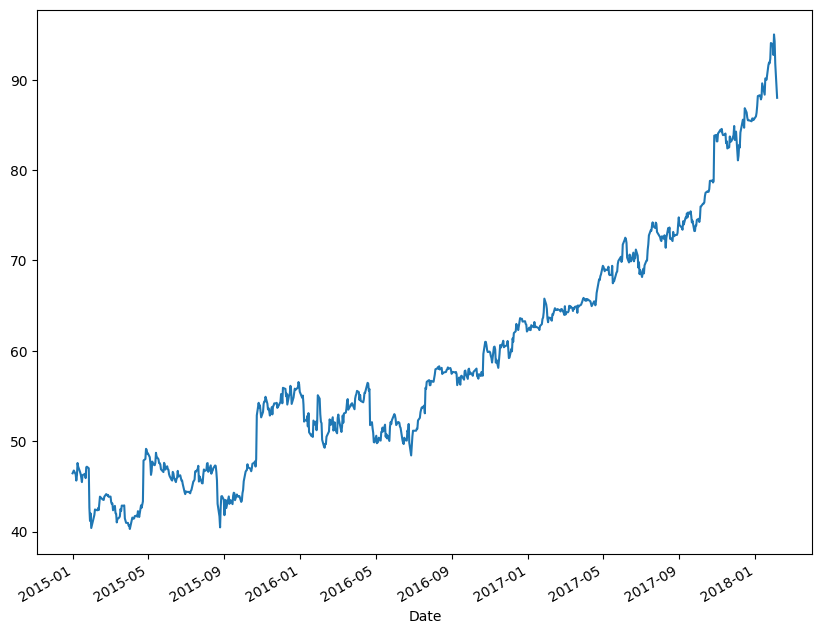

In [20]:
plt.figure(figsize=(10, 8))
ms['Close'].plot()
plt.show()

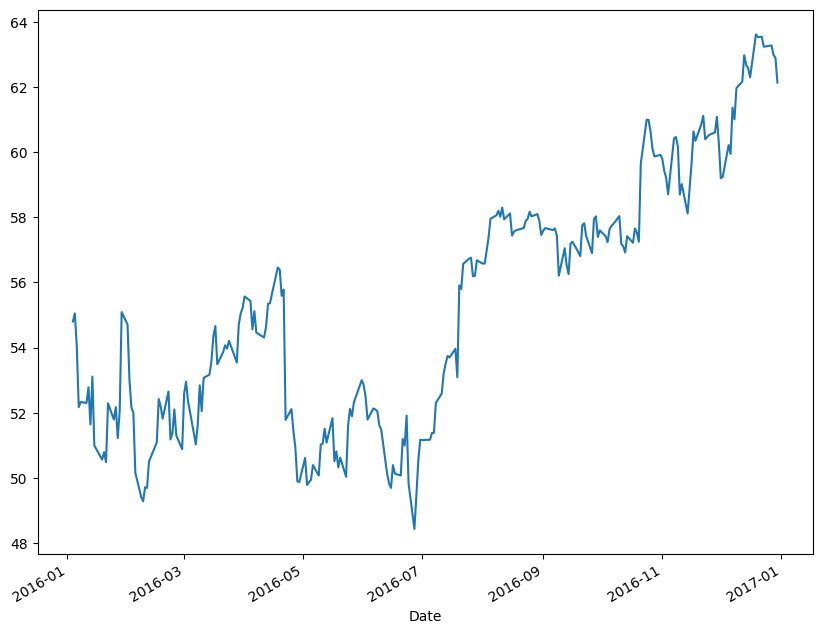

In [21]:
plt.figure(figsize=(10, 8))
# plot only the Close price of 2016 of Microsoft, 1 line 
ms.loc['2016-01-01':'2016-12-31', 'Close'].plot()
plt.show()

The two graphs above display data on Microsoft 